In [17]:
import os, shutil, pathlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [18]:
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")
base_dir = pathlib.Path('cats_vs_dogs_small')

In [19]:
def make_subset(subset_name, start_index, end_index):
     for category in ("cat", "dog"): 
        dir = new_base_dir / subset_name / category 
        os.makedirs(dir) 
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)] 
        for fname in fnames: shutil.copyfile(src=original_dir / fname, dst=dir / fname)

In [20]:
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

После разделения набора данных должна получиться следующая структура каталогов:

 ![Projektin rakenne](structure.png)

Проверим по одному примеру фото из каждого раздела:

Test (cat):
 - ![Test_cat](cats_vs_dogs_small/test/cat/cat.1500.jpg)

Test (dog):
 - ![Test_dog](cats_vs_dogs_small/test/dog/dog.1500.jpg)

Train (cat):
 - ![Test_cat](cats_vs_dogs_small/train/cat/cat.0.jpg)

Train (dog):
 - ![Test_dog](cats_vs_dogs_small/train/dog/dog.0.jpg)

Validation (cat):
 - ![Test_cat](cats_vs_dogs_small/validation/cat/cat.1000.jpg)

Validation (dog):
 - ![Test_dog](cats_vs_dogs_small/validation/dog/dog.1000.jpg)

In [21]:
from tensorflow import keras 
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [22]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

In [23]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [24]:
from tensorflow.keras.utils import image_dataset_from_directory

In [25]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [26]:
train_dataset = image_dataset_from_directory(
    base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [27]:
import numpy as np 
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [28]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 41s 641ms/step - loss: 0.7713 - accuracy: 0.5205 - val_loss: 0.6951 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 44s 706ms/step - loss: 0.7518 - accuracy: 0.5595 - val_loss: 0.6755 - val_accuracy: 0.6190
Epoch 3/30
63/63 [==============================] - 42s 661ms/step - loss: 0.6891 - accuracy: 0.6160 - val_loss: 0.6452 - val_accuracy: 0.6470
Epoch 4/30
63/63 [==============================] - 42s 671ms/step - loss: 0.6590 - accuracy: 0.6420 - val_loss: 0.6195 - val_accuracy: 0.6520
Epoch 5/30
63/63 [==============================] - 43s 678ms/step - loss: 0.5845 - accuracy: 0.6830 - val_loss: 0.6574 - val_accuracy: 0.6110
Epoch 6/30
63/63 [==============================] - 42s 669ms/step - loss: 0.5778 - accuracy: 0.6950 - val_loss: 0.6306 - val_accuracy: 0.6740
Epoch 7/30
63/63 [==============================] - 43s 693ms/step - loss: 0.5353 - accuracy: 0.7305 - val_loss: 0.5540 - val_accuracy: 0.7220

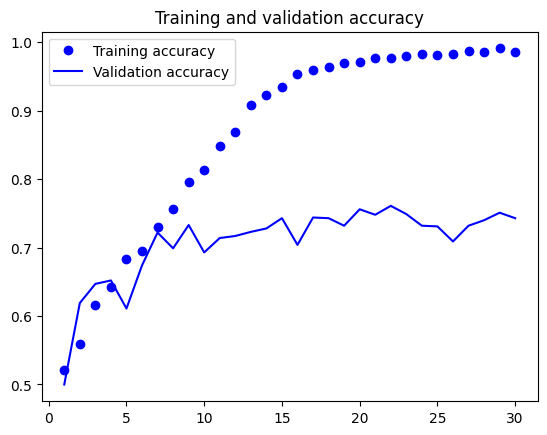

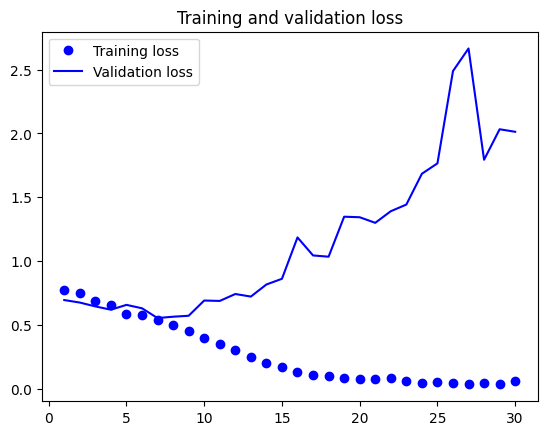

In [29]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

На графиках наблюдается эффект переобучения:
- Точность на обучающих данных растет и приближается к 100 %, а потери приближаются к нолю примерно после 18 эпох и продолжают оставаться такими же. 
- Точность на проверочных данных останавливается на отметке 70-75 %. Потери на этапе проверки достигают минимума примерно после 8 эпох и затем увеличиваются

Протестируем модель 

In [30]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset) 
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 4s 60ms/step - loss: 0.5682 - accuracy: 0.7095
Test accuracy: 0.710


Точность 70% и потери 56% это достаточно невысокий результат

Посмотрим на примеры неудачных предсказаний:

63/63 [==============================] - 4s 61ms/step


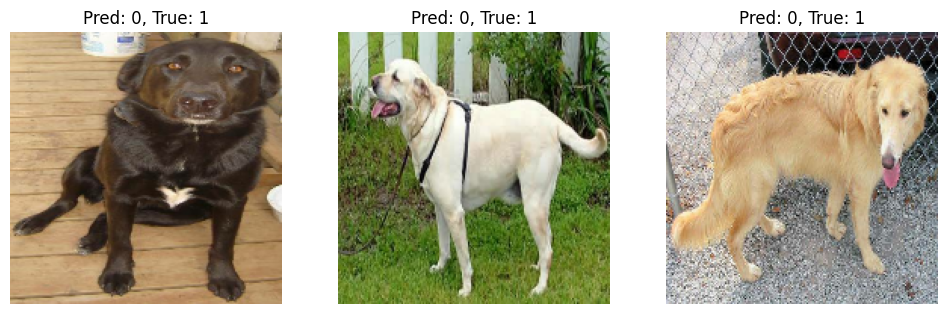

In [31]:
# Получаем предсказания модели
test_model = keras.models.load_model("convnet_from_scratch.keras")
predictions = test_model.predict(test_dataset)
predicted_labels = np.argmax(predictions, axis=1)

# Получаем истинные метки
true_labels = np.concatenate([y for _, y in test_dataset], axis=0)

# Находим индексы неправильных предсказаний
incorrect_indices = np.where(predicted_labels != true_labels)[0]

# Выводим первые 3 неправильных предсказаний
def plot_incorrect_predictions(test_dataset, incorrect_indices, predicted_labels, true_labels):
    plt.figure(figsize=(12, 12))
    for i, idx in enumerate(incorrect_indices[:3]): 
        ax = plt.subplot(3, 3, i + 1)
        # Извлекаем изображения из тестового набора данных
        image, _ = next(iter(test_dataset.unbatch().skip(idx).take(1)))
        plt.imshow(image.numpy().astype("uint8"))
        plt.title(f"Pred: {predicted_labels[idx]}, True: {true_labels[idx]}")
        plt.axis("off")

plot_incorrect_predictions(test_dataset, incorrect_indices, predicted_labels, true_labels)
plt.show()

Причиной переобучения является недостаточное количество образцов для обучения модели. Попробуем предоставить нашей модели больше данных за счет добавления нескольких слоев обогащения данных в начале модели

In [32]:
# from tensorflow.keras import layers
# data_augmentation = keras.Sequential(
#     [
#         layers.RandomFlip("horizontal"),
#         layers.RandomRotation(0.3),
#         layers.RandomZoom(0.1),
#     ]
# )

In [33]:
# plt.figure(figsize=(10, 10)) 
# for images, _ in train_dataset.take(1):
#     for i in range(3):
#         augmented_images = data_augmentation(images)
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(augmented_images[0].numpy().astype("uint8"))
#         plt.axis("off")

In [34]:
# inputs = keras.Input(shape=(180, 180, 3))
# x = data_augmentation(inputs)
# x = layers.Rescaling(1./255)(x)
# x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
# x = layers.MaxPooling2D(pool_size=2)(x)
# x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
# x = layers.MaxPooling2D(pool_size=2)(x)
# x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
# x = layers.MaxPooling2D(pool_size=2)(x)
# x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
# x = layers.MaxPooling2D(pool_size=2)(x)
# x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
# x = layers.Flatten()(x)
# x = layers.Dropout(0.5)(x)
# outputs = layers.Dense(1, activation="sigmoid")(x)
# model = keras.Model(inputs=inputs, outputs=outputs)

# model.compile(loss="binary_crossentropy",
#               optimizer="rmsprop",
#               metrics=["accuracy"])

In [35]:
# callbacks = [
#     keras.callbacks.ModelCheckpoint(
#         filepath="convnet_from_scratch_with_augmentation.keras",
#         save_best_only=True,
#         monitor="val_loss")
# ]
# history = model.fit(
#     train_dataset,
#     epochs=100,
#     validation_data=validation_dataset,
#     callbacks=callbacks)

In [36]:
# test_model = keras.models.load_model(
#     "convnet_from_scratch_with_augmentation.keras")
# test_loss, test_acc = test_model.evaluate(test_dataset)
# print(f"Test accuracy: {test_acc:.3f}")

In [37]:
# accuracy = history.history["accuracy"]
# val_accuracy = history.history["val_accuracy"]
# loss = history.history["loss"]
# val_loss = history.history["val_loss"]
# epochs = range(1, len(accuracy) + 1)
# plt.plot(epochs, accuracy, "bo", label="Training accuracy")
# plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
# plt.title("Training and validation accuracy")
# plt.legend()
# plt.figure()
# plt.plot(epochs, loss, "bo", label="Training loss")
# plt.plot(epochs, val_loss, "b", label="Validation loss")
# plt.title("Training and validation loss")
# plt.legend()
# plt.show()

Создадим 2 экземпляра модели на основе VGG16. Одна из них будет с замороженными параметрами. После сравним результаты работы обеих моделей

In [38]:
conv_base = keras.applications.vgg16.VGG16(
weights="imagenet",
include_top=False,
input_shape=(180, 180, 3))

In [39]:
conv_base_frozen = keras.applications.vgg16.VGG16(
weights="imagenet",
include_top=False,
input_shape=(180, 180, 3))
conv_base.trainable = False

In [40]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [41]:
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

def get_features_and_labels_frozen(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base_frozen.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

In [42]:
train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

train_features_frozen, train_labels_frozen = get_features_and_labels_frozen(train_dataset)
val_features_frozen, val_labels_frozen = get_features_and_labels_frozen(validation_dataset)
test_features_frozen, test_labels_frozen = get_features_and_labels_frozen(test_dataset)

1/1 [==============================] - 0s 346ms/step


In [43]:
train_features.shape, train_features_frozen.shape

((2000, 5, 5, 512), (2000, 5, 5, 512))

In [44]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

model.compile(loss="binary_crossentropy",
            optimizer="rmsprop",
            metrics=["accuracy"])

In [45]:
callbacks = [ keras.callbacks.ModelCheckpoint( filepath="feature_extraction.keras", 
                                              save_best_only=True, 
                                              monitor="val_loss")]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 2s 21ms/step - loss: 12.6677 - accuracy: 0.9285 - val_loss: 4.1931 - val_accuracy: 0.9650
Epoch 2/20
63/63 [==============================] - 1s 22ms/step - loss: 2.7903 - accuracy: 0.9770 - val_loss: 3.3334 - val_accuracy: 0.9800
Epoch 3/20
63/63 [==============================] - 1s 17ms/step - loss: 2.3268 - accuracy: 0.9815 - val_loss: 3.5068 - val_accuracy: 0.9820
Epoch 4/20
63/63 [==============================] - 1s 18ms/step - loss: 1.5084 - accuracy: 0.9890 - val_loss: 4.9219 - val_accuracy: 0.9790
Epoch 5/20
63/63 [==============================] - 2s 28ms/step - loss: 1.1877 - accuracy: 0.9905 - val_loss: 15.9346 - val_accuracy: 0.9410
Epoch 6/20
63/63 [==============================] - 1s 13ms/step - loss: 1.0769 - accuracy: 0.9935 - val_loss: 4.5059 - val_accuracy: 0.9790
Epoch 7/20
63/63 [==============================] - 1s 16ms/step - loss: 0.3026 - accuracy: 0.9975 - val_loss: 6.8151 - val_accuracy: 0.9780
Epoch 8/20


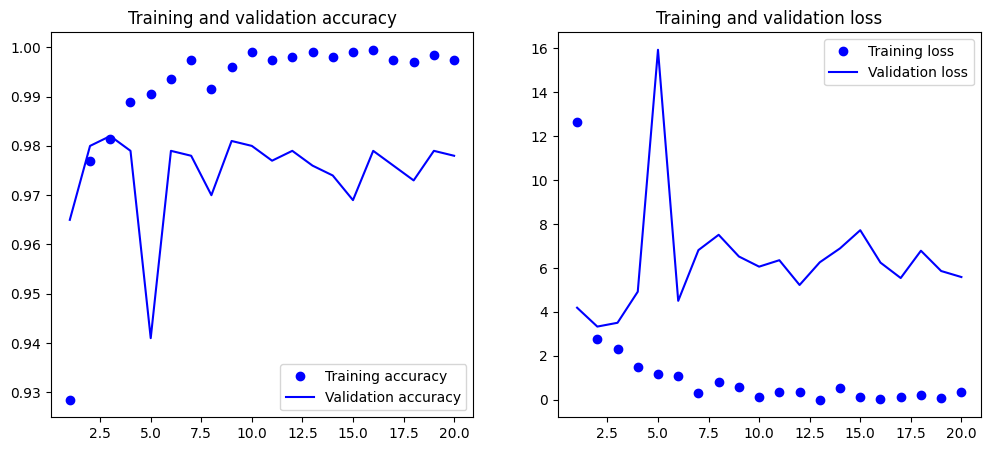

In [46]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)


fig, axes = plt.subplots(1, 2, figsize=(12, 5))


axes[0].plot(epochs, accuracy, "bo", label="Training accuracy")
axes[0].plot(epochs, val_accuracy, "b", label="Validation accuracy")
axes[0].set_title("Training and validation accuracy")
axes[0].legend()


axes[1].plot(epochs, loss, "bo", label="Training loss")
axes[1].plot(epochs, val_loss, "b", label="Validation loss")
axes[1].set_title("Training and validation loss")
axes[1].legend()

plt.show()

In [47]:
callbacks = [ keras.callbacks.ModelCheckpoint( filepath="feature_extraction_frozen.keras", 
                                              save_best_only=True, 
                                              monitor="val_loss")]
history = model.fit(
    train_features_frozen, train_labels_frozen,
    epochs=20,
    validation_data=(val_features_frozen, val_labels_frozen),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 1s 15ms/step - loss: 1.0366e-12 - accuracy: 1.0000 - val_loss: 5.5887 - val_accuracy: 0.9780
Epoch 2/20
63/63 [==============================] - 1s 17ms/step - loss: 0.1521 - accuracy: 0.9995 - val_loss: 8.1573 - val_accuracy: 0.9680
Epoch 3/20
63/63 [==============================] - 1s 20ms/step - loss: 0.1141 - accuracy: 0.9990 - val_loss: 5.5637 - val_accuracy: 0.9790
Epoch 4/20
63/63 [==============================] - 1s 21ms/step - loss: 0.0292 - accuracy: 0.9995 - val_loss: 9.0771 - val_accuracy: 0.9700
Epoch 5/20
63/63 [==============================] - 1s 21ms/step - loss: 0.2663 - accuracy: 0.9995 - val_loss: 5.8894 - val_accuracy: 0.9780
Epoch 6/20
63/63 [==============================] - 2s 25ms/step - loss: 1.0919e-37 - accuracy: 1.0000 - val_loss: 5.8894 - val_accuracy: 0.9780
Epoch 7/20
63/63 [==============================] - 1s 18ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 5.8894 - val_accuracy: 0.9780
E

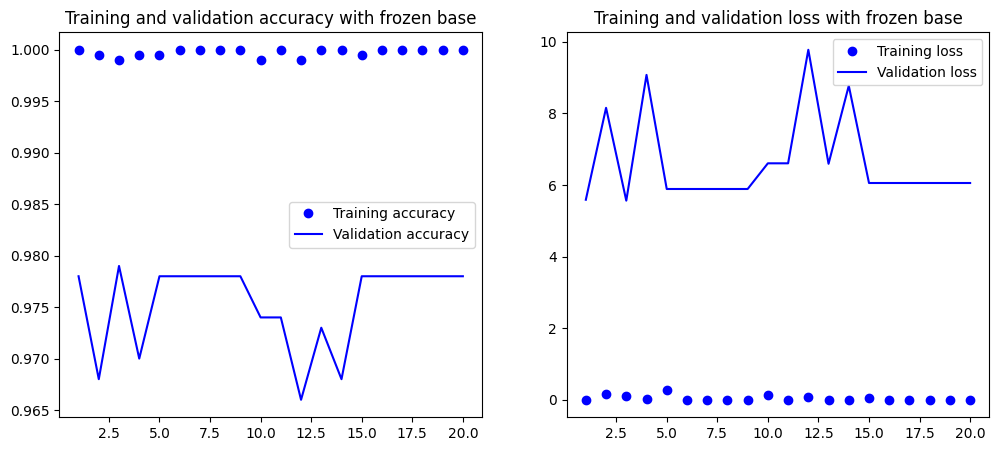

In [48]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)


fig, axes = plt.subplots(1, 2, figsize=(12, 5))


axes[0].plot(epochs, accuracy, "bo", label="Training accuracy")
axes[0].plot(epochs, val_accuracy, "b", label="Validation accuracy")
axes[0].set_title("Training and validation accuracy with frozen base")
axes[0].legend()


axes[1].plot(epochs, loss, "bo", label="Training loss")
axes[1].plot(epochs, val_loss, "b", label="Validation loss")
axes[1].set_title("Training and validation loss with frozen base")
axes[1].legend()

plt.show()

### Сравнение CNN с VGG16:

- **Переобучение**: Обе модели страдают от переобучения, но в обычной CNN это более выражено, с учетом резкого колебания валидационной точности и потерь
- **Генерализация**: VGG16, особенно с замороженной основой, показывает более стабильные результаты генерализации (меньше колебаний)
- **Начальная точность**: CNN быстрее достигает высокой точности, но менее стабильно удерживает ее на уровне валидации

### Выводы:
- Обычная CNN может быть слишком чувствительной к тренировочным данным, требуется улучшение обобщающей способности
- Использование предобученной модели VGG16 дает преимущества в задачах, требующих более устойчивых результатов

Далее рассмотрим прием выделения признаков, позволяющий использовать обогащение данных в процессе обучения. Объединим модели conv_base с новым полносвязным классификатором и проведем ее полноценное обучение.

Для этого заморозим сверточную основу. Замораживание одного или нескольких слоев предотвращает изменение весовых коэффициентов в них в процессе обучения. Если этого не сделать, представления, прежде изученные сверточной основой, изменятся в процессе обучения на новых данных. Так как слои Dense сверху инициализируются случайными значениями, в сети могут произойти существенные изменения весов, фактически разрушив представления, полученные ранее.

In [49]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

In [50]:
print("This is the number of trainable weights "
"after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


In [71]:
data_augmentation = keras.Sequential( 
    [ layers.RandomFlip("horizontal"), 
      layers.RandomRotation(0.5), 
      layers.RandomZoom(0.5), ])

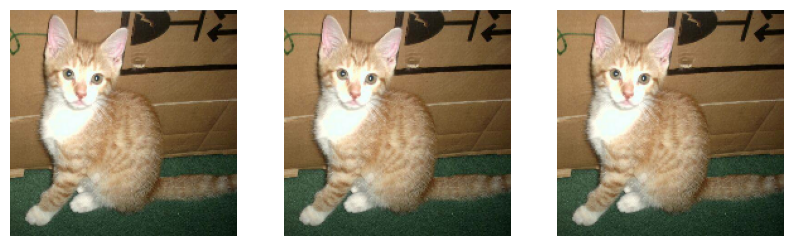

In [87]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(3):  # 9, чтобы заполнить 3x3 сетку
        augmented_images = data_augmentation(tf.expand_dims(images[0], 0))
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

plt.show()

In [53]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy", 
              optimizer="rmsprop", 
              metrics=["accuracy"])

In [54]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 72s 1s/step - loss: 26.0259 - accuracy: 0.8925 - val_loss: 6.5668 - val_accuracy: 0.9590
Epoch 2/50
63/63 [==============================] - 70s 1s/step - loss: 6.0780 - accuracy: 0.9470 - val_loss: 3.6944 - val_accuracy: 0.9720
Epoch 3/50
63/63 [==============================] - 71s 1s/step - loss: 4.9862 - accuracy: 0.9555 - val_loss: 3.9817 - val_accuracy: 0.9750
Epoch 4/50
63/63 [==============================] - 70s 1s/step - loss: 3.8471 - accuracy: 0.9695 - val_loss: 5.7564 - val_accuracy: 0.9670
Epoch 5/50
63/63 [==============================] - 69s 1s/step - loss: 4.0484 - accuracy: 0.9715 - val_loss: 6.0887 - val_accuracy: 0.9680
Epoch 6/50
63/63 [==============================] - 69s 1s/step - loss: 3.4154 - accuracy: 0.9715 - val_loss: 3.2707 - val_accuracy: 0.9820
Epoch 7/50
63/63 [==============================] - 69s 1s/step - loss: 2.2352 - accuracy: 0.9800 - val_loss: 5.4491 - val_accuracy: 0.9690
Epoch 8/50
63/63 [=

KeyboardInterrupt: 

In [ ]:
test_model = keras.models.load_model(
"feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 47s 740ms/step - loss: 4.3115 - accuracy: 0.9730
Test accuracy: 0.973


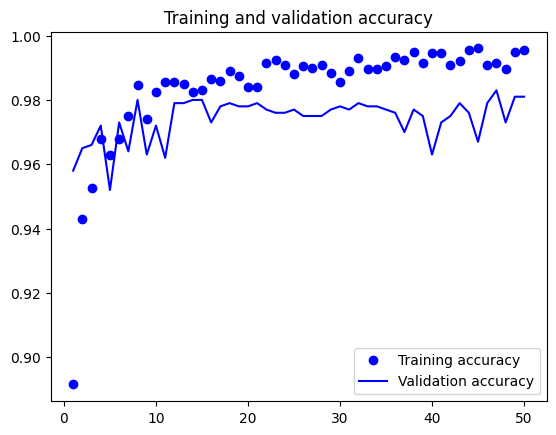

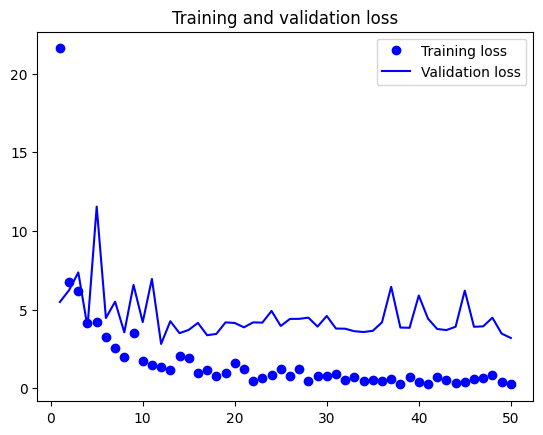

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()